In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm
import concurrent.futures

print(os.listdir())
import matplotlib.pyplot as plt

['sampling_examples.jpg', 'youtube.ipynb', 'shaded.png', 'graph_example450.jpg', 'graph_example400.jpg', 'graph_example350.jpg', 'deezer_ego.ipynb', 'sampling_test.ipynb', 'graph_example550.jpg', 'graph_example50.jpg', 'RMAT.ipynb', 'graph_example300.jpg', 'social_to_adjacency.ipynb', 'graph_example0.jpg', 'graph_example150.jpg', '.ipynb_checkpoints', 'graph_example100.jpg', 'twitch.ipynb', 'musae_facebook_edges.csv', 'Figures', 'social_to_ds.ipynb', 'large_twitch_edges.csv', 'graph_example200.jpg', 'cleaner_algorithm.ipynb', 'graph_example250.jpg', 'generate_figures.ipynb', 'nb_class_assignment.ipynb', 'graph_example500.jpg', '.DS_Store', 'artist_edges.csv']


In [2]:
parent_directory = os.path.dirname(os.getcwd())
data_directory   = os.path.join(parent_directory, "raw_datasets/twitch/ENGB")

In [3]:
filename = "musae_ENGB_edges.csv"
dataset_path = os.path.join(data_directory, filename)

social_data = pd.read_csv(dataset_path, delimiter = ",", skiprows = 0)
print(social_data.shape)
# np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")
social_data.head()

(35324, 2)


,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [4]:
target_filename = "musae_ENGB_target.csv"
target_path     = os.path.join(data_directory, target_filename)

target_data = pd.read_csv(target_path, delimiter = ",", skiprows = 0)
target_data.head()

node_ids = target_data["new_id"].tolist()
page_types = target_data["mature"].tolist()


unique_page_types = np.unique(page_types)
int_labels = [i for i in range(unique_page_types.shape[0])]

conv_dict = {}
for i, page_type in enumerate(list(unique_page_types)):
    conv_dict[page_type] = int_labels[i]
    
print(conv_dict)

int_labels = {}

for i, item in enumerate(page_types):
    int_labels[str(i)] = conv_dict[item]

{False: 0, True: 1}


In [5]:
import json

attribute_filename = "musae_ENGB_features.json"
attribute_path     = os.path.join(data_directory, attribute_filename)

with open(attribute_path, "r") as f:
    attribute_data = json.load(f)

In [6]:
    
attribute_shape = len(attribute_data["15"])

keys = list(attribute_data.keys())
lengths = [len(attribute_data[l]) for l in keys]
tokens = []
for k in keys:
    tokens += attribute_data[k]
print(np.unique(lengths))
print(np.min(tokens))
print(np.max(tokens))

def feature_to_token(feature, min_t = 0, max_t = 4800):
    out_vector = np.zeros(max_t)
    out_vector[feature] = 1
    return out_vector

[  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  68  69  70  71  73  74  75  80  85  91 152 155]
0
3169


/home/alex/anaconda3/envs/gui_dev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(7126, 4800)
UMAP(n_components=20, n_jobs=6, n_neighbors=100, verbose=1)
Fri Aug 12 09:38:34 2022 Construct fuzzy simplicial set
Fri Aug 12 09:38:34 2022 Finding Nearest Neighbors
Fri Aug 12 09:38:34 2022 Building RP forest with 9 trees
Fri Aug 12 09:38:34 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Fri Aug 12 09:38:49 2022 Finished Nearest Neighbor Search
Fri Aug 12 09:38:50 2022 Construct embedding


Epochs completed: 100%| ████████████████████████████████████████ 500/500 [00:10]


Fri Aug 12 09:39:01 2022 Finished embedding


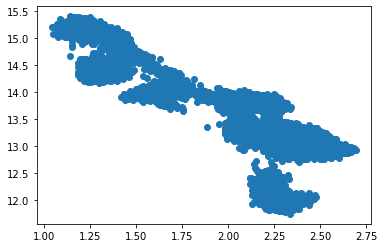

In [7]:
from umap import UMAP
embedder = UMAP(n_components = 20, n_neighbors = 100, n_jobs = 6, verbose = 1)

X = np.array([feature_to_token(attribute_data[k]) for k in keys])
print(X.shape)

features = embedder.fit_transform(X)

plt.scatter(features[:,0], features[:,1])
plt.show()

In [8]:
# G = nx.Graph()
# for i in tqdm(range(social_data.shape[0])):
#     G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
# edgelist = [(social_data.iloc[i,0], social_data.iloc[i,1]) for i in tqdm(range(social_data.shape[0]))]
# print(edgelist)

columns = list(social_data.columns)
print(columns)

G = nx.from_pandas_edgelist(social_data, columns[0], columns[1], create_using = nx.Graph)

for i, node in enumerate(list(G.nodes)):
    
    G.nodes[node]["target"] = int_labels[str(node)]
    G.nodes[node]["attribute"] = features[i,:]
    # print(features[i,:])

['from', 'to']


In [9]:
G = nx.convert_node_labels_to_integers(G)

(35324, 2)
7126
2000
400000


  0%|                                                   | 0/200 [00:00<?, ?it/s]

(28, 20)
0.014


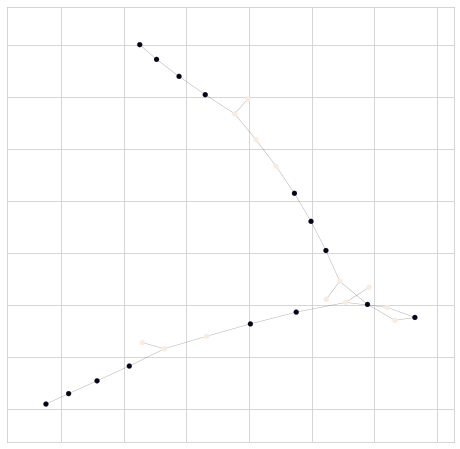

 24%|██████████                                | 48/200 [00:01<00:04, 33.44it/s]

(45343, 20)
22.6715


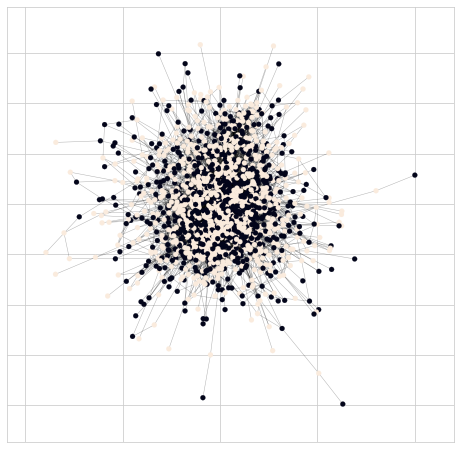

 50%|████████████████████▌                    | 100/200 [00:15<00:04, 22.82it/s]

(103972, 20)
51.986


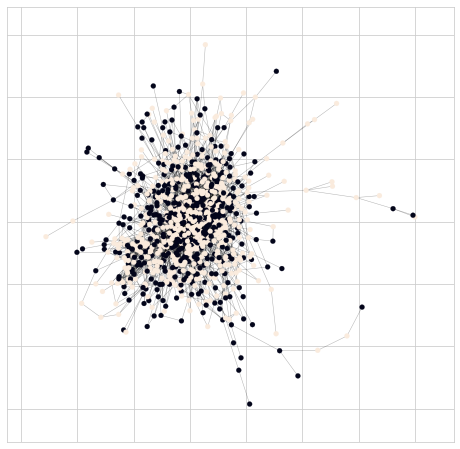

 74%|██████████████████████████████▎          | 148/200 [00:21<00:02, 24.58it/s]

(155932, 20)
77.966


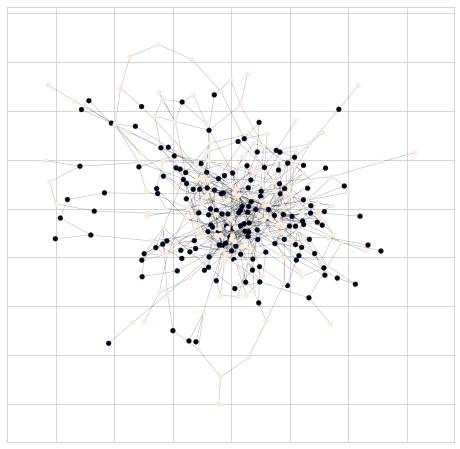

100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.25it/s]

(846451, 2)
(209971,)


In [10]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler, DiffusionSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 200

graph_ind_array = np.zeros(n_nodes)
min_per_graph = 20
n_per_graph = 2000 #int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs



print(total_n)
graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())

offset_index = 0
for i in tqdm(range(n_graphs)):
    
    
    sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = np.random.randint(min_per_graph, n_per_graph), #n_per_graph,#
                               seed = np.random.randint(1, 1e9))
    new_graph = sampler.sample(G)
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    nodes = list(new_graph.nodes())
    
    node_labels_g = [new_graph.nodes[n]["target"] for n in new_graph.nodes]
    node_attrs_g = [new_graph.nodes[n]["attribute"] for n in new_graph.nodes]
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
        graph_ind_array = np.array(np.full(len(nodes), i+1))
        node_labels = np.array(node_labels_g)
        node_attrs = np.array(node_attrs_g)
        
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
        graph_ind_array = np.append(graph_ind_array, np.array(np.full(len(nodes), i+1)))
        node_labels = np.append(node_labels, node_labels_g)
        node_attrs = np.append(node_attrs, node_attrs_g, axis = 0)
    
    if i % 50 == 0:
        print(node_attrs.shape)
        print(node_attrs.shape[0]/n_per_graph)
        
        plt.figure(figsize = (8,8))
        
        pos = nx.spring_layout(
          new_graph, k=0.1, iterations=100)
        
        
        colors = []
        
        for g in new_graph.nodes:
            colors.append(new_graph.nodes[g]["target"])
        
        nx.draw_networkx_nodes(
          new_graph,
          pos,
          node_size=25,
          node_color=colors,
          alpha=1,
          linewidths=0.2)#,
          # font_size=1.5)
        nx.draw_networkx_edges(new_graph, pos, alpha=0.3, width=0.5)

        plt.savefig(f"graph_example{i}.jpg")
        plt.show()
    offset_index += len(nodes)

print(graph_adj.shape)
print(graph_ind_array.shape)

total_n = graph_ind_array.shape[0]

In [11]:
node_attrs.shape

(209971, 20)

In [12]:
data_dir =        "/home/alex/Projects/GRAN_social/data/TWITCH/"

# for file in os.listdir(data_dir):
#     print(file)
#     if "DUMMY" in file:
#         shutil.rmtree(f"{data_dir}{file}")

np.savetxt(f'{data_dir}TWITCH_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(f'{data_dir}TWITCH_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(f'{data_dir}TWITCH_node_labels.txt', node_labels, fmt = "%d")
print(node_labels.shape)

np.savetxt(f'{data_dir}TWITCH_node_attributes.txt', node_attrs, fmt = "%f", delimiter=",")
print(node_labels.shape)

# np.savetxt(f'{data_dir}TWITCH_node_attributes.txt', node_labels, fmt = "%d")
# print(node_labels.shape)

np.savetxt(f'{data_dir}TWITCH_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(total_n).shape)


        
# np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

# np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
# print(np.arange(1, total_n+1).shape)

# np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
# print(np.ones(total_n).shape)

(209971,)
(209971,)
(209971,)


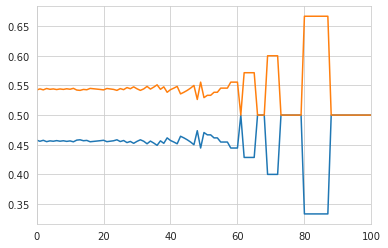

In [13]:
from scipy.ndimage import gaussian_filter1d


def calculate_probability_by_degree(G):
    
    unique_page_types = []
    for n in G.nodes:
        if G.nodes[n]["target"] not in unique_page_types:
            unique_page_types.append(G.nodes[n]["target"])

    degrees = {}
    for item in unique_page_types:
        degrees[item] = []

    for n in list(G.nodes()):
        cl = G.nodes[n]["target"]
        deg = G.degree(n)
        degrees[cl].append(deg)

    degree_list = [degrees[d] for d in degrees]
    labels = list(degrees.keys())

    # plt.hist(degree_list, label = labels, bins = 100, histtype = "step")
    # plt.yscale("log")
    # plt.legend()

    degree_array = np.zeros((1000, len(labels)))

    max_bin = np.max([np.max(d) for d in degree_list])

    for i, d in enumerate(degree_list):

        count, bins = np.histogram(d, bins = 1000, range = (0, max_bin))

        n_degrees = count.shape[0]

        count[count == 0] = 1

        degree_array[:n_degrees, i] = gaussian_filter1d(count, sigma = 15)

    sum_array = np.sum(degree_array, axis = 1)

    for d in range(degree_array.shape[1]):
        degree_array[:,d] = degree_array[:,d] / sum_array

    plt.plot(degree_array[:,0])
    plt.plot(degree_array[:,1])

    plt.xlim([0,100])
    plt.show()
calculate_probability_by_degree(G)

In [14]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [15]:


# # for i in range(n_graphs):
    
# #     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
# #     if i == n_graphs - 1:
# #         graph_ind_array[(i+1)*n_per_graph:] = i+1

# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
# print(graph_ind_array.shape)

In [16]:
# np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
# print(np.arange(1, n_nodes+1).shape)

In [17]:
# np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
# print(np.ones(n_nodes).shape)

In [18]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [19]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [20]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape